<a href="https://colab.research.google.com/github/NA0724/StockPricePrediction_LSTM/blob/main/StockPricePredictionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install preprocessing
!pip install numpy 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 

In [27]:
#from google.colab import drive
#drive.mount('/content/drive')
#dataset=pd.read_csv('drive/My Drive/apple_share_price.csv')
dataset=pd.read_csv('apple_share_price.csv')
dataset = dataset.reindex(index = dataset.index[::-1])
dataset

Mounted at /content/drive


,Date,Open,High,Low,Close,Volume
1663,3-Jan-11,46.52,47.18,46.41,47.08,111280407
1662,4-Jan-11,47.49,47.50,46.88,47.33,77337001
1661,5-Jan-11,47.08,47.76,47.07,47.71,63879193
1660,6-Jan-11,47.82,47.89,47.56,47.68,75106626
1659,7-Jan-11,47.71,48.05,47.41,48.02,77982212
...,...,...,...,...,...,...
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273


In [18]:
obs=np.arange(1, len(dataset)+1, 1)
obs

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118])

In [ ]:
avg=dataset.mean(axis=1)
avg2=dataset[['High', 'Low', 'Close']].mean(axis=1)
close_val=dataset[['Close']]
close_val

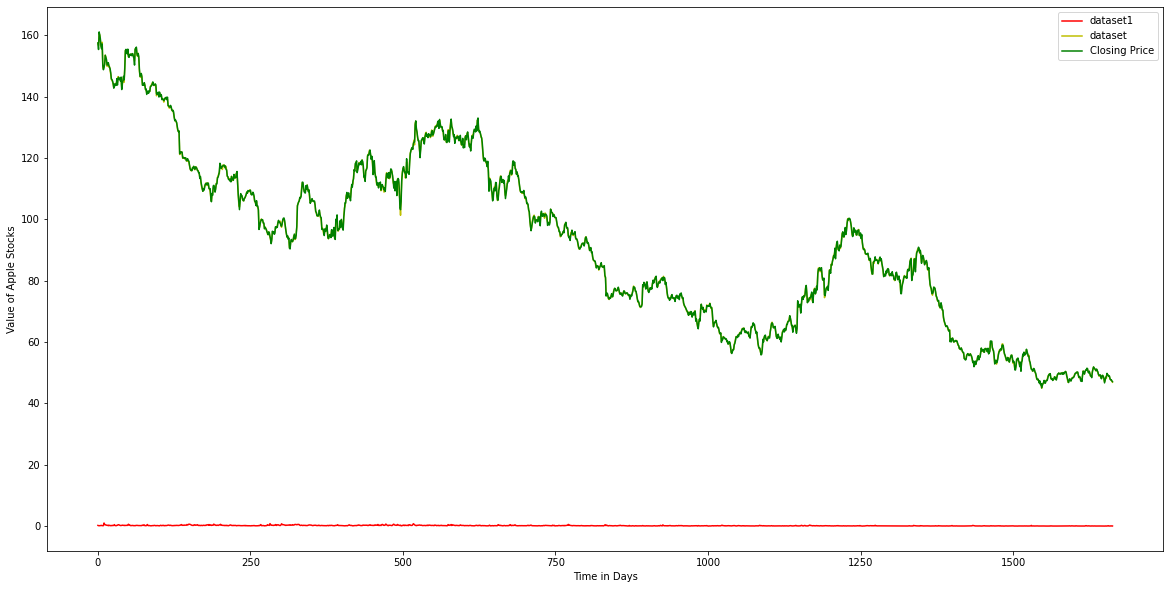

In [79]:
plt.figure(figsize=(20,10))
plt.plot(avg, 'r', label = 'dataset1')
plt.plot(avg2, 'y', label = 'dataset')
plt.plot(close_val, 'g', label = 'Closing Price')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('Value of Apple Stocks')
plt.show()

In [ ]:
# PREPARATION OF TIME SERIES DATASE
avg = np.reshape(avg, (len(avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
avg = scaler.fit_transform(avg)
avg

In [ ]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(avg) * 0.75)
test_OHLC = len(avg) - train_OHLC
train_OHLC, test_OHLC = avg[0:train_OHLC,:], avg[train_OHLC:len(avg),:]
train_OHLC

In [55]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
# THIS FUNCTION CAN BE USED TO CREATE A TIME SERIES DATASET FROM ANY 1D ARRAY
# data_X, data_Y = [], []
# step_size=1
# for i in range(len(dataset)-step_size-1):
#   a = dataset.iloc[i:i+step_size, 0]
#   data_X.append(a)
#   data_Y.append(dataset.iloc[i + step_size, 0])
# dataX=np.array(data_X)
# dataY=np.array(data_Y)

data_X, data_Y = [], []
step_size=1
for i in range(len(train_OHLC)-step_size-1):
  a = train_OHLC[i:i+step_size, 0]
  data_X.append(a)
  data_Y.append(train_OHLC[i + step_size, 0])
trainX=np.array(data_X)
trainY=np.array(data_Y)
trainX

array([[0.21754716],
       [0.1435594 ],
       [0.11422489],
       ...,
       [0.03866165],
       [0.0771851 ],
       [0.11518354]])

In [ ]:
testdataX, testdataY = [], []
for i in range(len(test_OHLC )-step_size-1):
  a = test_OHLC [i:i+step_size, 0]
  testdataX.append(a)
  testdataY.append(test_OHLC [i + step_size, 0])
testX=np.array(testdataX)
testY=np.array(testdataY)
testY

In [59]:
#Reshaping training and data sets
trainX=np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

In [60]:
#LSTM model
model=Sequential()
model.add(LSTM(32, input_shape=(1,step_size), return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [61]:
#model compiling and training
model.compile(loss='mean_squared_error', optimizer='adagrad')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)
#prediction
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

Epoch 1/5
1246/1246 - 6s - loss: 0.0285 - 6s/epoch - 5ms/step
Epoch 2/5
1246/1246 - 4s - loss: 0.0190 - 4s/epoch - 3ms/step
Epoch 3/5
1246/1246 - 3s - loss: 0.0161 - 3s/epoch - 2ms/step
Epoch 4/5
1246/1246 - 3s - loss: 0.0149 - 3s/epoch - 2ms/step
Epoch 5/5
1246/1246 - 3s - loss: 0.0143 - 3s/epoch - 2ms/step
13/13 [==============================] - 0s 2ms/step


In [80]:
trainPredict

array([[0.1617595 ],
       [0.16089556],
       [0.16055046],
       ...,
       [0.15965515],
       [0.16011274],
       [0.16056177]], dtype=float32)

In [81]:
testPredict

array([[0.16005814],
       [0.16138327],
       [0.16013092],
       [0.15974794],
       [0.15974452],
       [0.15924895],
       [0.15959002],
       [0.15969975],
       [0.1595513 ],
       [0.15995832],
       [0.16063786],
       [0.1603424 ],
       [0.16066803],
       [0.16099167],
       [0.16072807],
       [0.16018638],
       [0.16017127],
       [0.16049562],
       [0.16051307],
       [0.16093837],
       [0.1602664 ],
       [0.16075909],
       [0.1602461 ],
       [0.16059372],
       [0.16022396],
       [0.16054171],
       [0.16228777],
       [0.16033638],
       [0.16055384],
       [0.15994951],
       [0.15985917],
       [0.16007347],
       [0.16009665],
       [0.16008607],
       [0.16029245],
       [0.16004497],
       [0.1599928 ],
       [0.16018501],
       [0.15993786],
       [0.16012834],
       [0.16004825],
       [0.15989575],
       [0.15979192],
       [0.15978058],
       [0.15971935],
       [0.15983519],
       [0.15960793],
       [0.159

In [63]:
#DENORMALISE for plotting
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

In [67]:
#accuracy metric: rmse
rmse_train=math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
rmse_test=math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [71]:
rmse_train

0.11901244980860537

In [72]:
rmse_test

0.1161512124797131

In [68]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))

1/1 [==============================] - 0s 30ms/step


In [69]:
np.asscalar(last_val)

<ipython-input-69-ae9936113193>:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  np.asscalar(last_val)


0.15957514941692352

In [70]:
np.asscalar(last_val*next_val)

<ipython-input-70-c744992bdb39>:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  np.asscalar(last_val*next_val)


0.027161652222275734

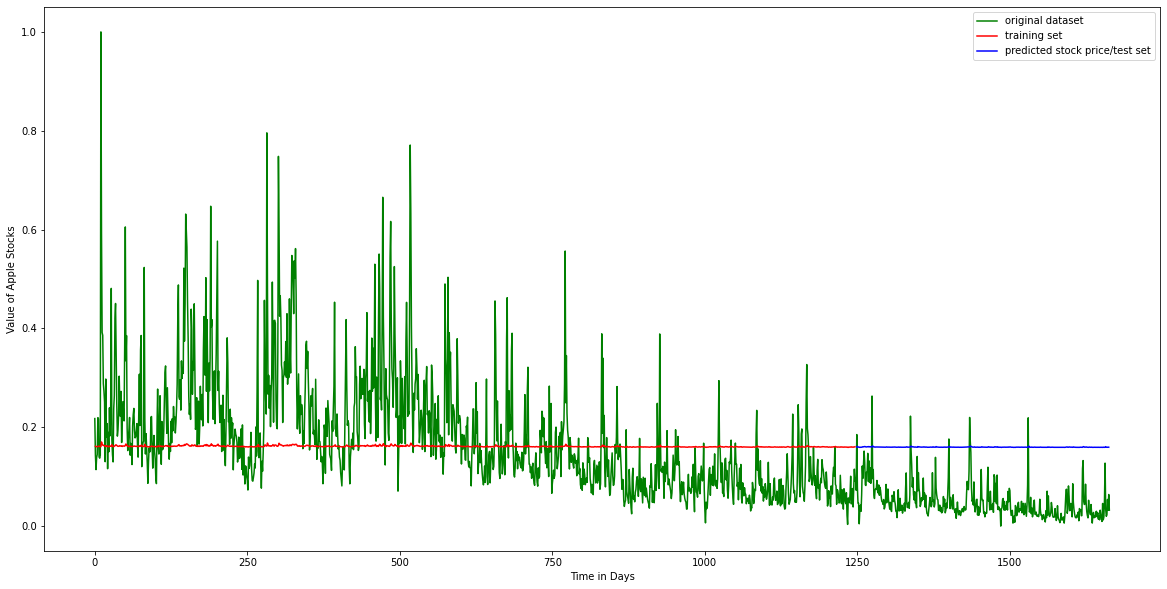

In [75]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(avg)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
avg = scaler.inverse_transform(avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.figure(figsize=(20,10))
plt.plot(avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('Value of Apple Stocks')
plt.show()